###### The latest version of this IPython notebook is available at [http://github.com/jckantor/CBE40455](http://github.com/jckantor/CBE20255)  for noncommercial use under terms of the [Creative Commons Attribution Noncommericial ShareAlike License](http://creativecommons.org/licenses/by-nc-sa/4.0/).

J.C. Kantor (Kantor.1@nd.edu)

# Getting Started with CVXPY

This [IPython notebook](http://ipython.org/notebook.html) demonstrates use of the [CVXPY](http://www.cvxpy.org/en/latest/) package for describing and solving convex optimization problems.

## Solving linear equations

One of the simpliest use cases for cvxpy is solving a system of linear equations. For example, consider the pair of the equations

\begin{align*}
3\,x + 4\,y & = 26 \\
2\,x - 3\,y & = -11
\end{align*}

where $x$ and $y$ are the unknowns. Each equation is a linear equality constraint. The problem is easily solved with a few simple cvxpy constructss.

In [16]:
import numpy as np
import cvxpy as cvx

# create the variables to solve for
x = cvx.Variable()
y = cvx.Variable()

# create a list of equality constraints
eqns = [
    3*x + 4*y == 26,
    2*x - 3*y == -11
]

# create a problem instance 
prob = cvx.Problem(cvx.Minimize(0),eqns)

# solve
prob.solve()
print prob.status

# display solution
print x.value
print y.value

optimal
2.0
5.0


## Regression

Get the historical record of ice out dates on Rainy Lake, Minnesota.

Data Download Status: OK


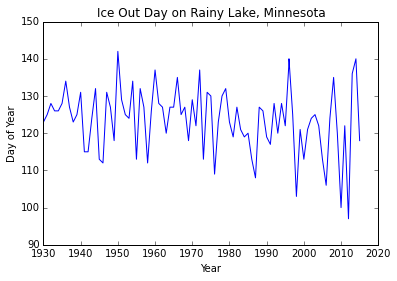

In [126]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import urllib2
import json
from dateutil.parser import parse
import datetime

# Lake ID for Rainy Lake
lakeid = '69069400'

# Get Ice-out Data
url = 'http://www.dnr.state.mn.us/services/climatology/ice_out_by_lake.html?id='+lakeid
response = urllib2.urlopen(url)
data = json.load(response) 
print 'Data Download Status: ' + data['status']

# Calculate ice out 'day of year' for each date
dates = [parse(d['date']) for d in data['result']['values']]

year = np.array([d.year for d in dates])
iceout = np.array([1 + datetime.date.toordinal(d) - datetime.date(d.year,1,1).toordinal()
                for d in dates ])

plt.plot(year, iceout)
plt.title('Ice Out Day on Rainy Lake, Minnesota')
plt.ylabel('Day of Year')
plt.xlabel('Year');

Create a regression model and fit using cvxpy.

In [134]:
slope = cvx.Variable()
a = cvx.Variable()
intercept = cvx.Variable()
pred = cvx.Variable(len(year))

con = [pred == intercept + slope*(year-1930)]
obj = cvx.Minimize(cvx.norm(iceout - pred))

prob = cvx.Problem(obj,con)
prob.solve()

print "    Slope: {0:8.4f}".format(slope.value)
print "Intercept: {0:8.4f}".format(intercept.value)

    Slope:  -0.0778
Intercept: 126.8789


Plot the resulting fit and compare to the original data.

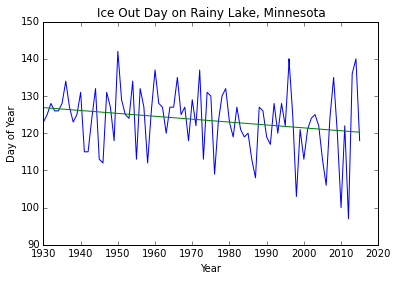

In [135]:
plt.plot(year, iceout, year, pred.value)
plt.title('Ice Out Day on Rainy Lake, Minnesota')
plt.ylabel('Day of Year')
plt.xlabel('Year');